**<h1> Unsupervised Learning Analysis on Energy Consumption of Buildings in Chicago</h1>**

**<h2>Introduction</h2>**
<p>This study looks at energy usage for different buildings in the city of Chicago with different square footage, occupancy, building age, purpose etc.. I perform the data cleaning, exploration and feature engineering to streamline and prepare the dataset for clustering. The dataset has about 67,000 obsaervations and 73 variables. Through clustering analysis, I analyze different building in different areas with varying parameters using the different clustering tools including DBSCAN, K-means, GMM and Hierarchical clustering. Through the process I delineate which algorithms work and provide reasons why. I also make use of U-Map for dimension reduction. I choose the best performing clustering algorithm using the silhouette score as the metric of comparison. The silhouette score looks at the difference between a the mean distance between a data point and all other datapoints in the current cluster compared to the mean distance between the data point and all other data points in the nearest other cluster.  I move a step further to attempt to explain what these clusters mean.</p>

<p>I chose this dataset because I have an enthusiasm for working with energy data. The main problem statement that this project was aimed for was to figure out if we can better understand the clients and their habits through clustering with regard to energy constumption. Studying the distict clusters would provide more information on how to better provide services to customers.

<p>The main features of concern are the power ( measured in kilowatt hours or kwh) and the gas comsumption measured in "therm" units. One therm is equal to 29.3 kwh. Other notable features include the total population, the average age of the building, building type, average house size, occupied units , etc. Some clustering algorithms were not used, and I provide reasons why. For example, for the GMM , the features are required to be normally distributed and that wasn't the case. For future work, I would go ahead and perform clustering analysis on each distinct building type to better understand the data. This would be helpful to the company to understand their target customer, know how to improve efficiency in energy delivery and cost, and deal with distribution and storage. </p>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import math
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
sns.set()
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
!pip install umap-learn
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap
from sklearn.cluster import KMeans, MiniBatchKMeans
import scipy as sp
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#load the dataframe
energy_df=pd.read_csv("https://raw.githubusercontent.com/sembahen/Data_Files/master/energy-usage-2010-1.csv")

**<h2>Exploratory Data Analysis</h2>**

In [0]:
#head
energy_df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS,GAS ACCOUNTS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MEAN 2010,KWH STANDARD DEVIATION 2010,KWH MINIMUM 2010,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT STANDARD DEVIATION 2010,KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010,KWH SQFT 2ND QUARTILE 2010,KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010,THERM MEAN 2010,THERM STANDARD DEVIATION 2010,THERM MINIMUM 2010,THERM 1ST QUARTILE 2010,THERM 2ND QUARTILE 2010,THERM 3RD QUARTILE 2010,THERM MAXIMUM 2010,THERMS SQFT MEAN 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS SQFT MINIMUM 2010,THERMS SQFT 1ST QUARTILE 2010,THERMS SQFT 2ND QUARTILE 2010,THERMS SQFT 3RD QUARTILE 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2326.0,2131.0,1400.0,620.0,502.0,224.0,222.0,187.0,197.0,252.0,744.0,2112.0,10917.0,11,NaN,11134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1819.5,547.64,1061.0,1334.0,1864.5,2306.0,2487.0,1855.67,490.89,1382.0,1382.0,1779.0,2162.0,2650.0,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064.0,8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10892.0,NaN,27354.67,22082.79,8886.0,8886.0,21363.0,51815.0,51815.0,10892.0,NaN,10892.0,10892.0,10892.0,10892.0,10892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,NaN,NaN,NaN,NaN,6057.0,4,NaN,7347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3028.5,4150.01,94.0,94.0,3028.5,5963.0,5963.0,7347.00,NaN,7347.0,7347.0,7347.0,7347.0,7347.0,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,391.0,400.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,NaN,400.0,400.0,400.0,400.0,400.0,2146.00,NaN,2146.0,2146.0,2146.0,2146.0,2146.0,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,NaN,NaN,949.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.0,NaN,949.0,949.0,949.0,949.0,949.0,2146.00,NaN,2146.0,2146.0,2146.0,2146.0,2146.0,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [0]:
#shape
energy_df.shape

(67051, 73)

In [0]:
#columns
energy_df.columns

Index(['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE',
       'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010',
       'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS',
       'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
       'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
       'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
       'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010',
       'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT',
       'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010',
       'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010',
       'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010',
       'KWH SQFT STANDARD DEV

In [0]:
#statistics of the numerical features
energy_df.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH,ZERO KWH ACCOUNTS,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MEAN 2010,KWH STANDARD DEVIATION 2010,KWH MINIMUM 2010,KWH 1ST QUARTILE 2010,KWH 2ND QUARTILE 2010,KWH 3RD QUARTILE 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT STANDARD DEVIATION 2010,KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010,KWH SQFT 2ND QUARTILE 2010,KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010,THERM MEAN 2010,THERM STANDARD DEVIATION 2010,THERM MINIMUM 2010,THERM 1ST QUARTILE 2010,THERM 2ND QUARTILE 2010,THERM 3RD QUARTILE 2010,THERM MAXIMUM 2010,THERMS SQFT MEAN 2010,THERMS SQFT STANDARD DEVIATION 2010,THERMS SQFT MINIMUM 2010,THERMS SQFT 1ST QUARTILE 2010,THERMS SQFT 2ND QUARTILE 2010,THERMS SQFT 3RD QUARTILE 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,67051.000000,6.482100e+04,6.281900e+04,6.556900e+04,6.547600e+04,6.519400e+04,6.528400e+04,6.523100e+04,6.514300e+04,6.476900e+04,6.532900e+04,6.549200e+04,6.550700e+04,6.575500e+04,6.590100e+04,6.537800e+04,6.618000e+04,5.709500e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.590100e+04,5.166600e+04,6.590100e+04,6.590100e+04,6.590100e+04,6.590100e+04,6.590100e+04,6.575500e+04,5.682100e+04,6.575500e+04,6.575500e+04,6.575500e+04,6.575500e+04,6.575500e+04,6.537800e+04,5.136700e+04,6.537800e+04,6.537800e+04,6.537800e+04,6.537800e+04,6.537800e+04,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,1.724126e+04,2.101798e+04,2.396298e+04,2.375188e+05,5.215940,3.940456e+03,3.439028e+03,2.828484e+03,1.492682e+03,9.778327e+02,6.226393e+02,5.360128e+02,5.168300e+02,5.161832e+02,7.377767e+02,1.464288e+03,3.219372e+03,2.001532e+04,2.564002e+04,2.469264e+04,6.288298e+04,4.279999e+04,3.680911e+04,3.912197e+04,5.574228e+04,8.571933e+04,1.257366e+05,7.690970e+03,3.576157e+03,5.598033e+03,5.787302e+03,7.267751e+03,9.547234e+03,1.147964e+04,4.076005e+03,2.754681e+03,2.264914e+03,2.543704e+03,3.632521e+03,5.494957e+03,8.247193e+03,7.199719e+03,3.267928e+03,5.276068e+03,5.457336e+03,6.798704e+03,8.910476e+03,1.075499e+04,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,3.175960e+05,3.633077e+05,4.105403e+05,4.294269e+06,23.369783,3.390012e+04,2.876359e+04,2.319531e+04,1.417244e+04,1.172709e+04,9.738232e+03,9.905899e+03,9.736800e+03,9.213344e+03,1.173384e+04,1.832421e+04,3.106257e+04,2.059462e+05,2.988848e+05,2.755098e+05,1.347881e+06,9.292621e+05,1.199767e+06,1.199895e+06,1.326801e+06,1.749046e+06,2.462590e+06,6.736307e+04,4.299889e+04,5.947221e+04,5.949783e+04,6.641661e+04,8.384202e+04,1.048007e+05,3.614810e+04,3.204733e+04,2.959248e+04,2.959620e+04,3.541399e+04,5.127661e+04,1.339235e+05,6.399848e+04,3.713655e+04,5.824186e+04,5.825904e+04,6.310906e+04,7.687466e+04,9.734542e+04,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14

In [0]:
#viewing the various columns, data types and nulls
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

In [0]:
#null values
energy_df.isnull().sum()

COMMUNITY AREA NAME                      0
CENSUS BLOCK                            77
BUILDING TYPE                           77
BUILDING_SUBTYPE                        77
KWH JANUARY 2010                       871
                                      ... 
OCCUPIED UNITS                          14
OCCUPIED UNITS PERCENTAGE             2445
RENTER-OCCUPIED HOUSING UNITS           14
RENTER-OCCUPIED HOUSING PERCENTAGE    2618
OCCUPIED HOUSING UNITS                  14
Length: 73, dtype: int64

I deleted the following features because they are in some way closely related and can be easily derived from some of the features already in the dataset.

In [0]:
delete1=['KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010',
       'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010',
       'KWH 3RD QUARTILE 2010',
       'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT MINIMUM 2010',
       'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010',
       'KWH SQFT 3RD QUARTILE 2010',
       'THERM MEAN 2010', 'THERM STANDARD DEVIATION 2010',
       'THERM 1ST QUARTILE 2010',
       'THERM 2ND QUARTILE 2010', 'THERM 3RD QUARTILE 2010',
       'THERMS SQFT STANDARD DEVIATION 2010',
       'THERMS SQFT 1ST QUARTILE 2010', 'THERMS SQFT 2ND QUARTILE 2010',
       'THERMS SQFT 3RD QUARTILE 2010']

In [0]:
#deleter the selected features in the list "delete1"
energy_df2=energy_df.drop(delete1, axis=1) 
energy_df2.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,KWH OCTOBER 2010,KWH NOVEMBER 2010,KWH DECEMBER 2010,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,THERM JANUARY 2010,THERM FEBRUARY 2010,THERM MARCH 2010,TERM APRIL 2010,THERM MAY 2010,THERM JUNE 2010,THERM JULY 2010,THERM AUGUST 2010,THERM SEPTEMBER 2010,THERM OCTOBER 2010,THERM NOVEMBER 2010,THERM DECEMBER 2010,TOTAL THERMS,GAS ACCOUNTS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MINIMUM 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT MAXIMUM 2010,THERM MINIMUM 2010,THERM MAXIMUM 2010,THERMS SQFT MEAN 2010,THERMS SQFT MINIMUM 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2326.0,2131.0,1400.0,620.0,502.0,224.0,222.0,187.0,197.0,252.0,744.0,2112.0,10917.0,11,NaN,11134.0,NaN,NaN,NaN,NaN,1061.0,2487.0,1855.67,1382.0,2650.0,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,4566.0,2787.0,3357.0,5540.0,15774.0,19676.0,82064.0,8,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10892.0,NaN,8886.0,51815.0,10892.0,10892.0,NaN,NaN,NaN,NaN,NaN,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1561.0,1388.0,1507.0,701.0,486.0,380.0,18.0,16.0,NaN,NaN,NaN,NaN,6057.0,4,NaN,7347.0,NaN,NaN,NaN,NaN,94.0,5963.0,7347.00,7347.0,7347.0,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,391.0,400.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,400.0,400.0,2146.00,2146.0,2146.0,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,310.0,268.0,163.0,77.0,57.0,23.0,19.0,8.0,14.0,10.0,NaN,NaN,949.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,949.0,949.0,2146.00,2146.0,2146.0,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


The following features are a monthly breakdown of the kwh and the therm. While I will use this for EDA at a later stage, I don't need to use the monthly changes in energy in my clustering analysis as I am looking at the bigger picture on the general trend; so the totals which are left in the dataset will be sufficient.

In [0]:
#monthly kwh
monthly_kwh=['KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']

In [0]:
#monthly therm
monthly_therm=['THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010',
       'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010',
       'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010',
       'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010']

In [0]:
#delete the features
energy_df3=energy_df2.drop(monthly_kwh,axis=1)
energy_df3=energy_df3.drop(monthly_therm,axis=1)

In [0]:
#statistics of the feature "total population"
energy_df3['TOTAL POPULATION'].describe()

count    67037.000000
mean       105.180169
std        801.339175
min          0.000000
25%         37.000000
50%         64.000000
75%        105.000000
max      67388.000000
Name: TOTAL POPULATION, dtype: float64

In [0]:
#I have the total kwh and total therm(gas). I am converting the therm to kwh using the formula: 1therm=29.3 kwh. I have the 2 in the same units for purposes of comparison.
Power=15718991627
Gas=1316107449*29.3

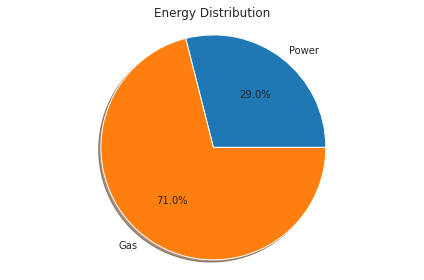

In [0]:
#check for the current pie chart
labels=['Power', 'Gas']
sizes=[Power,Gas]

#Plot a pie chart to show distribution
plt.pie(sizes, labels=labels, autopct='%1.1f%%' , shadow=True)

plt.axis('equal')
plt.title("Energy Distribution")
plt.tight_layout()

I can see from the pie chart that about 70% of the energy is from gas while the rest is electric power.

Furhter below, I look at the monthly trend of power and gas consumption.

In [0]:
x=['JAN','FEB','MAR','APR','MAY','JUN', 'JUL','AUG', 'SEPT','OCT', 'NOV', 'DEC']
mean=energy_df2.mean(axis = 0, skipna = True)
kwh_mean=mean[1:13] 

In [0]:
kwh_mean

KWH JANUARY 2010      17581.587791
KWH FEBRUARY 2010     17376.513841
KWH MARCH 2010        16242.122152
KWH APRIL 2010        15956.963796
KWH MAY 2010          19066.227803
KWH JUNE 2010         23004.852569
KWH JULY 2010         24828.906981
KWH AUGUST 2010       22675.264143
KWH SEPTEMBER 2010    18564.097159
KWH OCTOBER 2010      17241.260774
KWH NOVEMBER 2010     21017.981052
KWH DECEMBER 2010     23962.983303
dtype: float64

In [0]:
therm_mean=mean[15:27]
therm_mean 

THERM JANUARY 2010      3940.455778
THERM FEBRUARY 2010     3439.027842
THERM MARCH 2010        2828.483872
TERM APRIL 2010         1492.682418
THERM MAY 2010           977.832730
THERM JUNE 2010          622.639284
THERM JULY 2010          536.012847
THERM AUGUST 2010        516.830020
THERM SEPTEMBER 2010     516.183174
THERM OCTOBER 2010       737.776669
THERM NOVEMBER 2010     1464.287898
THERM DECEMBER 2010     3219.371930
dtype: float64

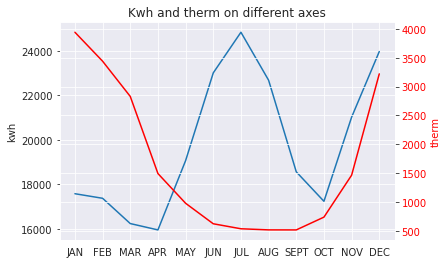

In [0]:
#The plot below is of power and gas on separate scales
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x,kwh_mean)
ax1.set_ylabel('kwh')
ax1.set_title('Kwh and therm on different axes')

ax2 = ax1.twinx()
ax2.plot(x, therm_mean, 'r-')
ax2.set_ylabel('therm', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [0]:
#i therm=29.3kwh
gas_mean=therm_mean *29.3 
gas_mean

THERM JANUARY 2010      115455.354302
THERM FEBRUARY 2010     100763.515768
THERM MARCH 2010         82874.577448
TERM APRIL 2010          43735.594847
THERM MAY 2010           28650.498989
THERM JUNE 2010          18243.331014
THERM JULY 2010          15705.176407
THERM AUGUST 2010        15143.119589
THERM SEPTEMBER 2010     15124.167000
THERM OCTOBER 2010       21616.856398
THERM NOVEMBER 2010      42903.635404
THERM DECEMBER 2010      94327.597541
dtype: float64

After matching the units, I plotted power and gas on the same scale. The trend is interesting because it matches the annual weather patterns. At the begining of the year, there is high gas consumption for heating because the months are colder. During this period, the electricity consumption is lower. As we move to the warmer months, gas consumption drops because heating is not needed. At the same time, power consumption increases because the ac's and fans and other cooling systems are used more and less gas is used. As we get towards the end of the year, we are moving back to the colder season. Gas consumtions starts to significantly increase again while electricity relatively stabilizes.

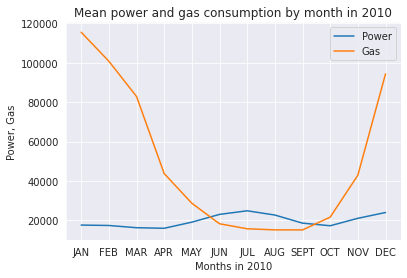

In [0]:

plt.plot(x, kwh_mean)
plt.plot(x, gas_mean)
plt.xlabel('Months in 2010')
plt.ylabel('Power, Gas')
plt.legend(['Power', 'Gas'], loc=1)
plt.title("Mean power and gas consumption by month in 2010")
plt.show()

In [0]:
energy_df3.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,TOTAL KWH,ELECTRICITY ACCOUNTS,ZERO KWH ACCOUNTS,TOTAL THERMS,GAS ACCOUNTS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MINIMUM 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT MAXIMUM 2010,THERM MINIMUM 2010,THERM MAXIMUM 2010,THERMS SQFT MEAN 2010,THERMS SQFT MINIMUM 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,0,10917.0,11,NaN,11134.0,NaN,NaN,NaN,NaN,1061.0,2487.0,1855.67,1382.0,2650.0,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,82064.0,8,3,NaN,NaN,10892.0,NaN,8886.0,51815.0,10892.0,10892.0,NaN,NaN,NaN,NaN,NaN,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,7,6057.0,4,NaN,7347.0,NaN,NaN,NaN,NaN,94.0,5963.0,7347.00,7347.0,7347.0,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,2,400.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,400.0,400.0,2146.00,2146.0,2146.0,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,3,949.0,Less than 4,NaN,2146.0,NaN,NaN,NaN,NaN,949.0,949.0,2146.00,2146.0,2146.0,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [0]:
energy_df3["COMMUNITY AREA NAME"].nunique()

77

The column "occupied housing units" and "occupied units" are essentially the same. I drop one of them.
Also, "census block" seems redundant so I drop it.

In [0]:
#dropping the columns
energy_df3=energy_df3.drop(["OCCUPIED UNITS","CENSUS BLOCK"],axis=1)

In [0]:
#shape
energy_df3.shape

(67051, 28)

In [0]:
#label encoding the object type
non_numeric_columns=energy_df3.select_dtypes(["object"]).columns
print(non_numeric_columns)
print("The number of non-numeric columns is {}".format(len(non_numeric_columns)))


Index(['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE',
       'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS'],
      dtype='object')
The number of non-numeric columns is 5


In [0]:
#create a new dataframe for the heatmap
energy_df4=energy_df3.copy()

In [0]:
#energy_df4['BUILDING TYPE']=energy_df4['BUILDING TYPE'].astype(float)

In [0]:
energy_df4['BUILDING TYPE'] = energy_df4['BUILDING TYPE'].astype(str) 
energy_df4['BUILDING_SUBTYPE'] = energy_df4['BUILDING_SUBTYPE'].astype(str) 
energy_df4['ELECTRICITY ACCOUNTS'] = energy_df4['ELECTRICITY ACCOUNTS'].astype(str) 
energy_df4['GAS ACCOUNTS'] = energy_df4['GAS ACCOUNTS'].astype(str) 

one hot encoding for the object type variables

In [0]:
#for purposes of drawing my heatmap, I one hhot encode all the categorial variables left

energy_df4['COMMUNITY AREA NAME'] =  label_encoder.fit_transform(energy_df4['COMMUNITY AREA NAME'])
energy_df4['BUILDING TYPE'] =label_encoder.fit_transform(energy_df4['BUILDING TYPE'])
energy_df4['BUILDING_SUBTYPE'] =  label_encoder.fit_transform(energy_df4['BUILDING_SUBTYPE'])
energy_df4['ELECTRICITY ACCOUNTS'] =  label_encoder.fit_transform(energy_df4['ELECTRICITY ACCOUNTS'])
energy_df4['GAS ACCOUNTS'] =  label_encoder.fit_transform(energy_df4['GAS ACCOUNTS'])



For purposed of generating a heatmap, I did one hot encoding and label encoding to coonvert the object type variables all to numeric.

In [0]:
#verifying that all features are numeric before I draw a heatmap
energy_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   COMMUNITY AREA NAME                 67051 non-null  int64  
 1   BUILDING TYPE                       67051 non-null  int64  
 2   BUILDING_SUBTYPE                    67051 non-null  int64  
 3   TOTAL KWH                           66180 non-null  float64
 4   ELECTRICITY ACCOUNTS                67051 non-null  int64  
 5   ZERO KWH ACCOUNTS                   67051 non-null  int64  
 6   TOTAL THERMS                        65755 non-null  float64
 7   GAS ACCOUNTS                        67051 non-null  int64  
 8   KWH TOTAL SQFT                      65901 non-null  float64
 9   THERMS TOTAL SQFT                   65378 non-null  float64
 10  KWH MINIMUM 2010                    66180 non-null  float64
 11  KWH MAXIMUM 2010                    66180

Heatmap to visualize the multi-collinearity of the dataset


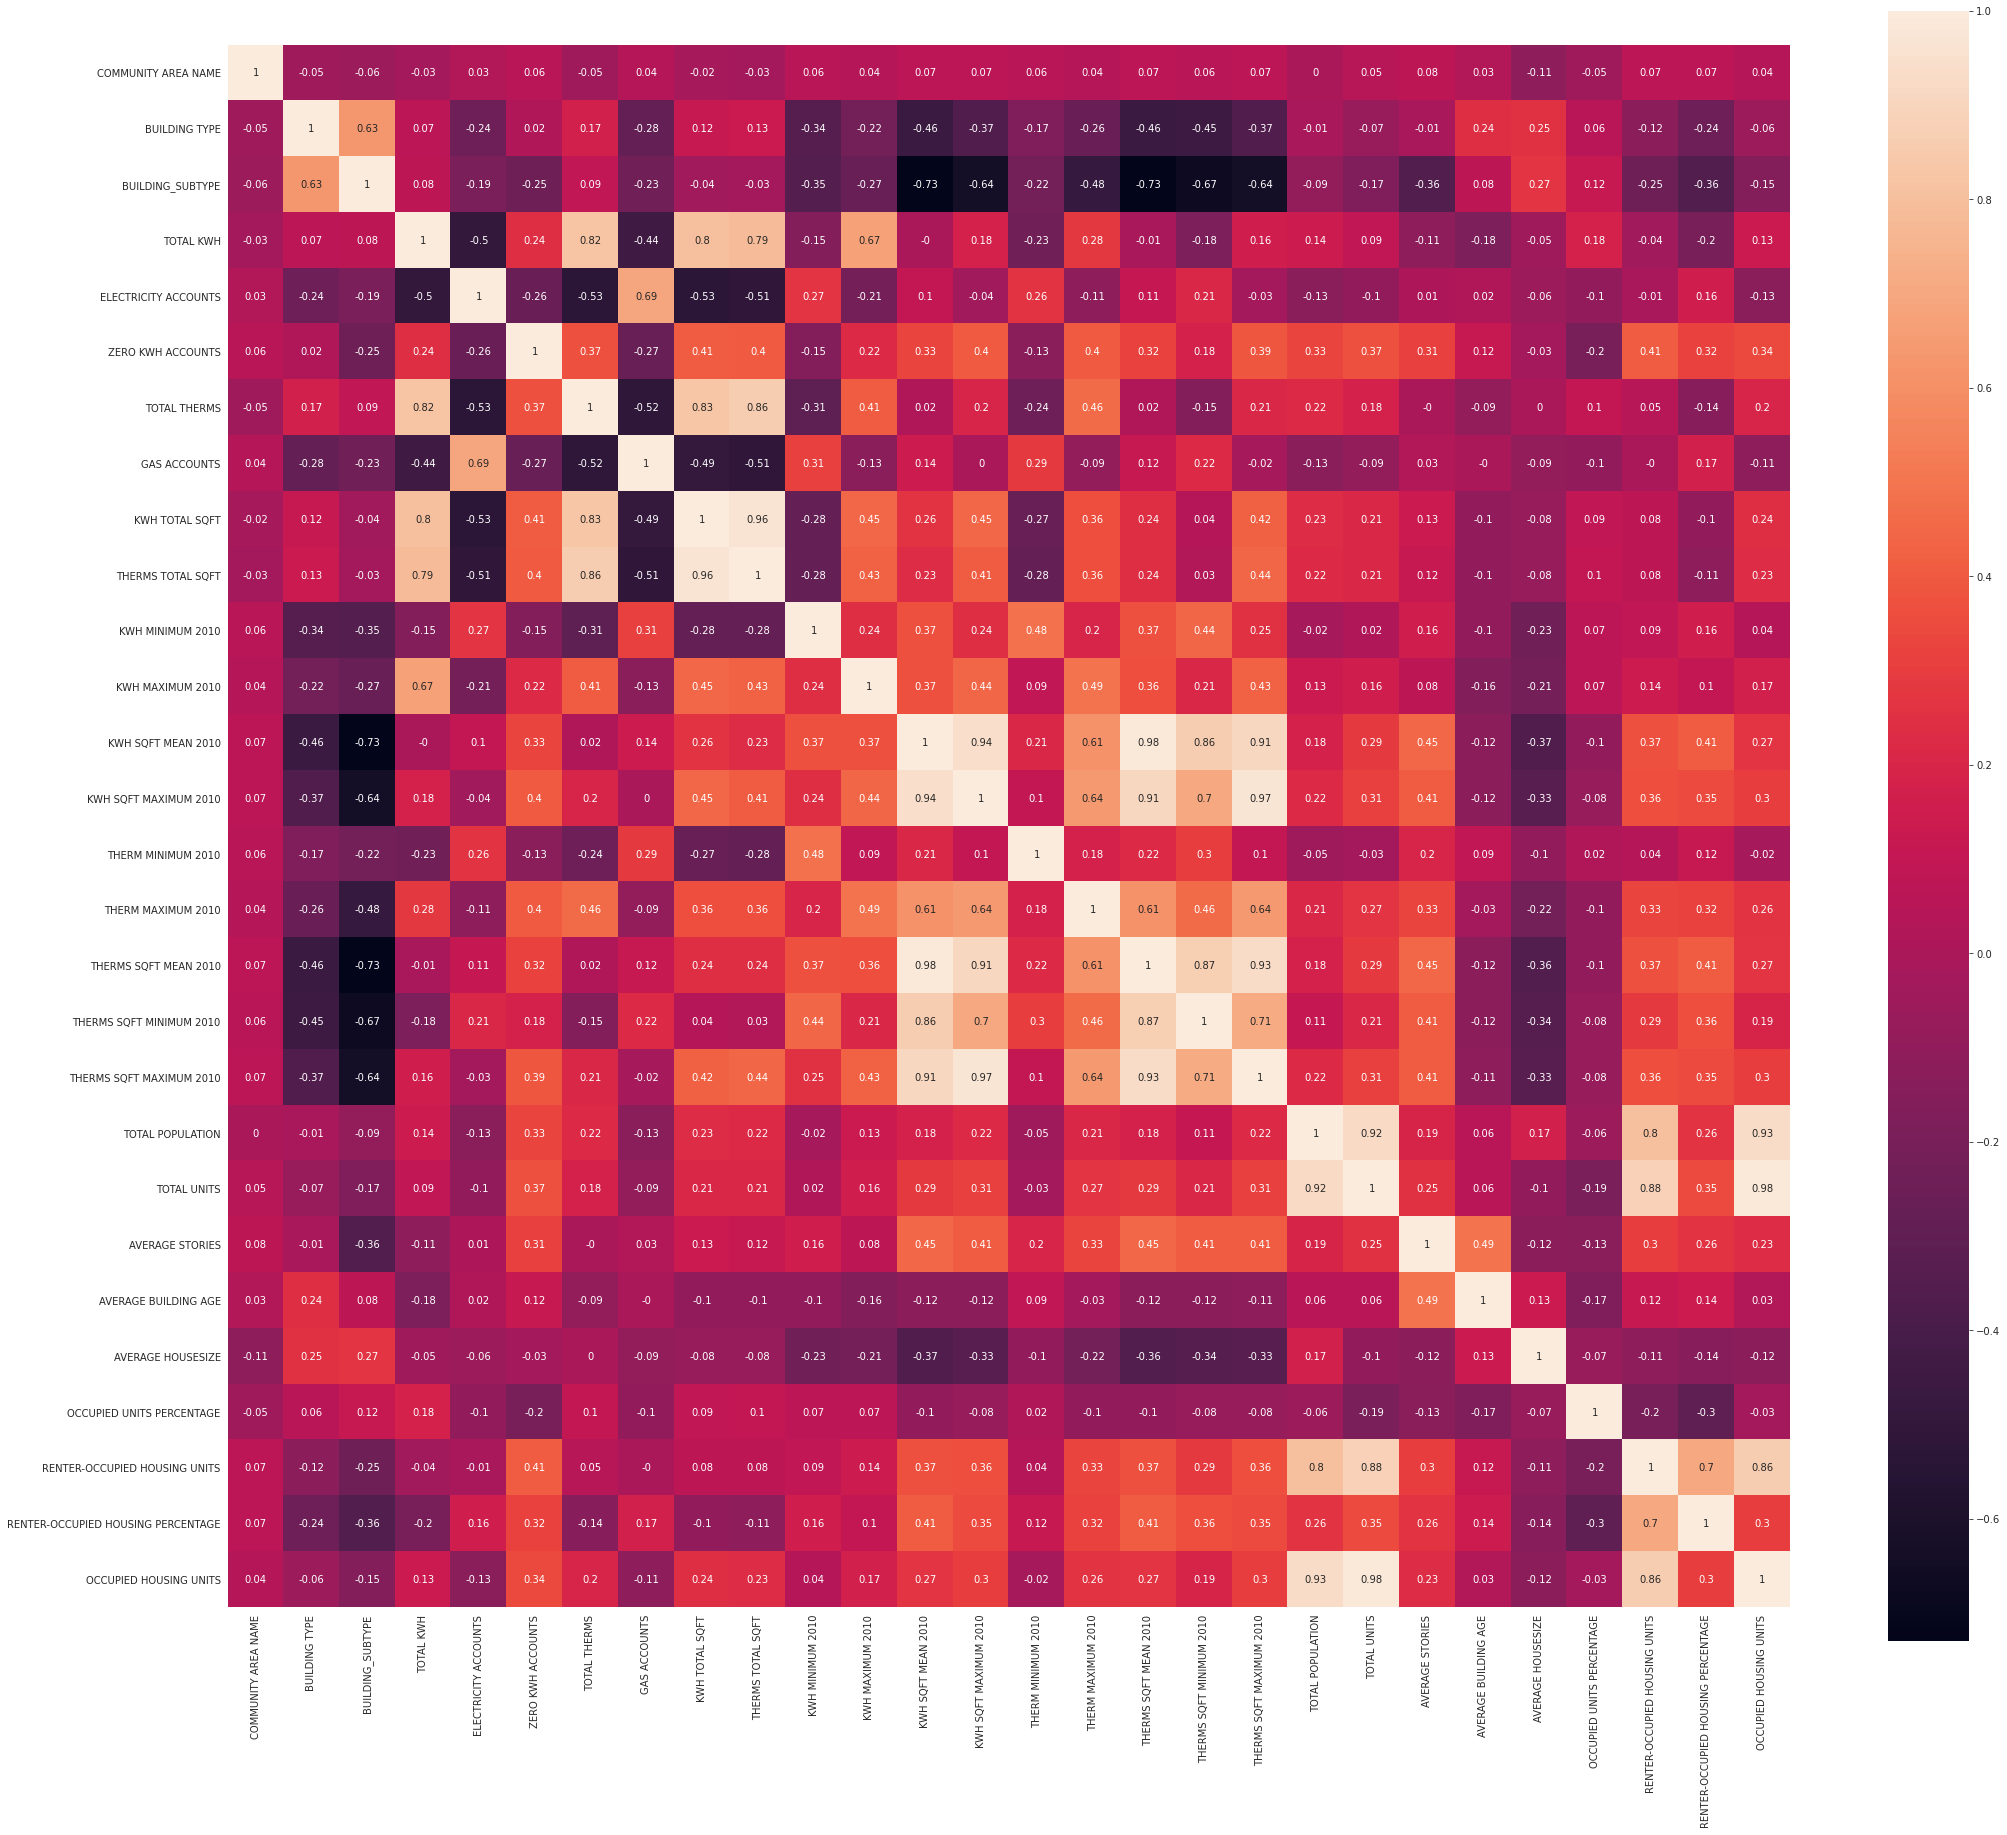

In [0]:
plt.figure(figsize=(35,30))
corrmat=energy_df4.corr(method ='spearman').round(2)
sns.heatmap(corrmat, square=True, annot=True,xticklabels=True, vmax=1, yticklabels=True)

From the heatmap, I can see that some features are highly correlated. Using the heatmap and through performing VIF, I determine which features whould be eliminated because they basically contain similar information about the variance of the dataset. 

In [0]:

#Code for VIF Calculation
#Writing a function to calculate the VIF values for numeric datasets
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
vif_cal(input_data=energy_df4, dependent_col="TOTAL KWH")

COMMUNITY AREA NAME  VIF =  1.01
BUILDING TYPE  VIF =  1.92
BUILDING_SUBTYPE  VIF =  1.95
ELECTRICITY ACCOUNTS  VIF =  2.11
ZERO KWH ACCOUNTS  VIF =  7.6
TOTAL THERMS  VIF =  149.0
GAS ACCOUNTS  VIF =  2.13
KWH TOTAL SQFT  VIF =  162.35
THERMS TOTAL SQFT  VIF =  159.93
KWH MINIMUM 2010  VIF =  1.82
KWH MAXIMUM 2010  VIF =  1.59
KWH SQFT MEAN 2010  VIF =  25.09
KWH SQFT MAXIMUM 2010  VIF =  35.34
THERM MINIMUM 2010  VIF =  2.18
THERM MAXIMUM 2010  VIF =  86.82
THERMS SQFT MEAN 2010  VIF =  36.09
THERMS SQFT MINIMUM 2010  VIF =  7.41
THERMS SQFT MAXIMUM 2010  VIF =  35.0
TOTAL POPULATION  VIF =  50.82
TOTAL UNITS  VIF =  557.83
AVERAGE STORIES  VIF =  2.75
AVERAGE BUILDING AGE  VIF =  1.24
AVERAGE HOUSESIZE  VIF =  7.58
OCCUPIED UNITS PERCENTAGE  VIF =  1.15
RENTER-OCCUPIED HOUSING UNITS  VIF =  79.24
RENTER-OCCUPIED HOUSING PERCENTAGE  VIF =  1.35
OCCUPIED HOUSING UNITS  VIF =  446.82


In [0]:
#I deleted the features that I found to statistically contain similar information 
energy_df5=energy_df4.copy()
energy_df5=energy_df5.drop(['TOTAL THERMS','THERMS TOTAL SQFT','KWH SQFT MEAN 2010','KWH SQFT MAXIMUM 2010',
                            'THERM MAXIMUM 2010','THERMS SQFT MEAN 2010','THERMS SQFT MAXIMUM 2010','TOTAL UNITS','RENTER-OCCUPIED HOUSING UNITS','OCCUPIED HOUSING UNITS'],axis=1)

As seen from the new hearmap below ,I have reduced the features with high multi-collinearity.

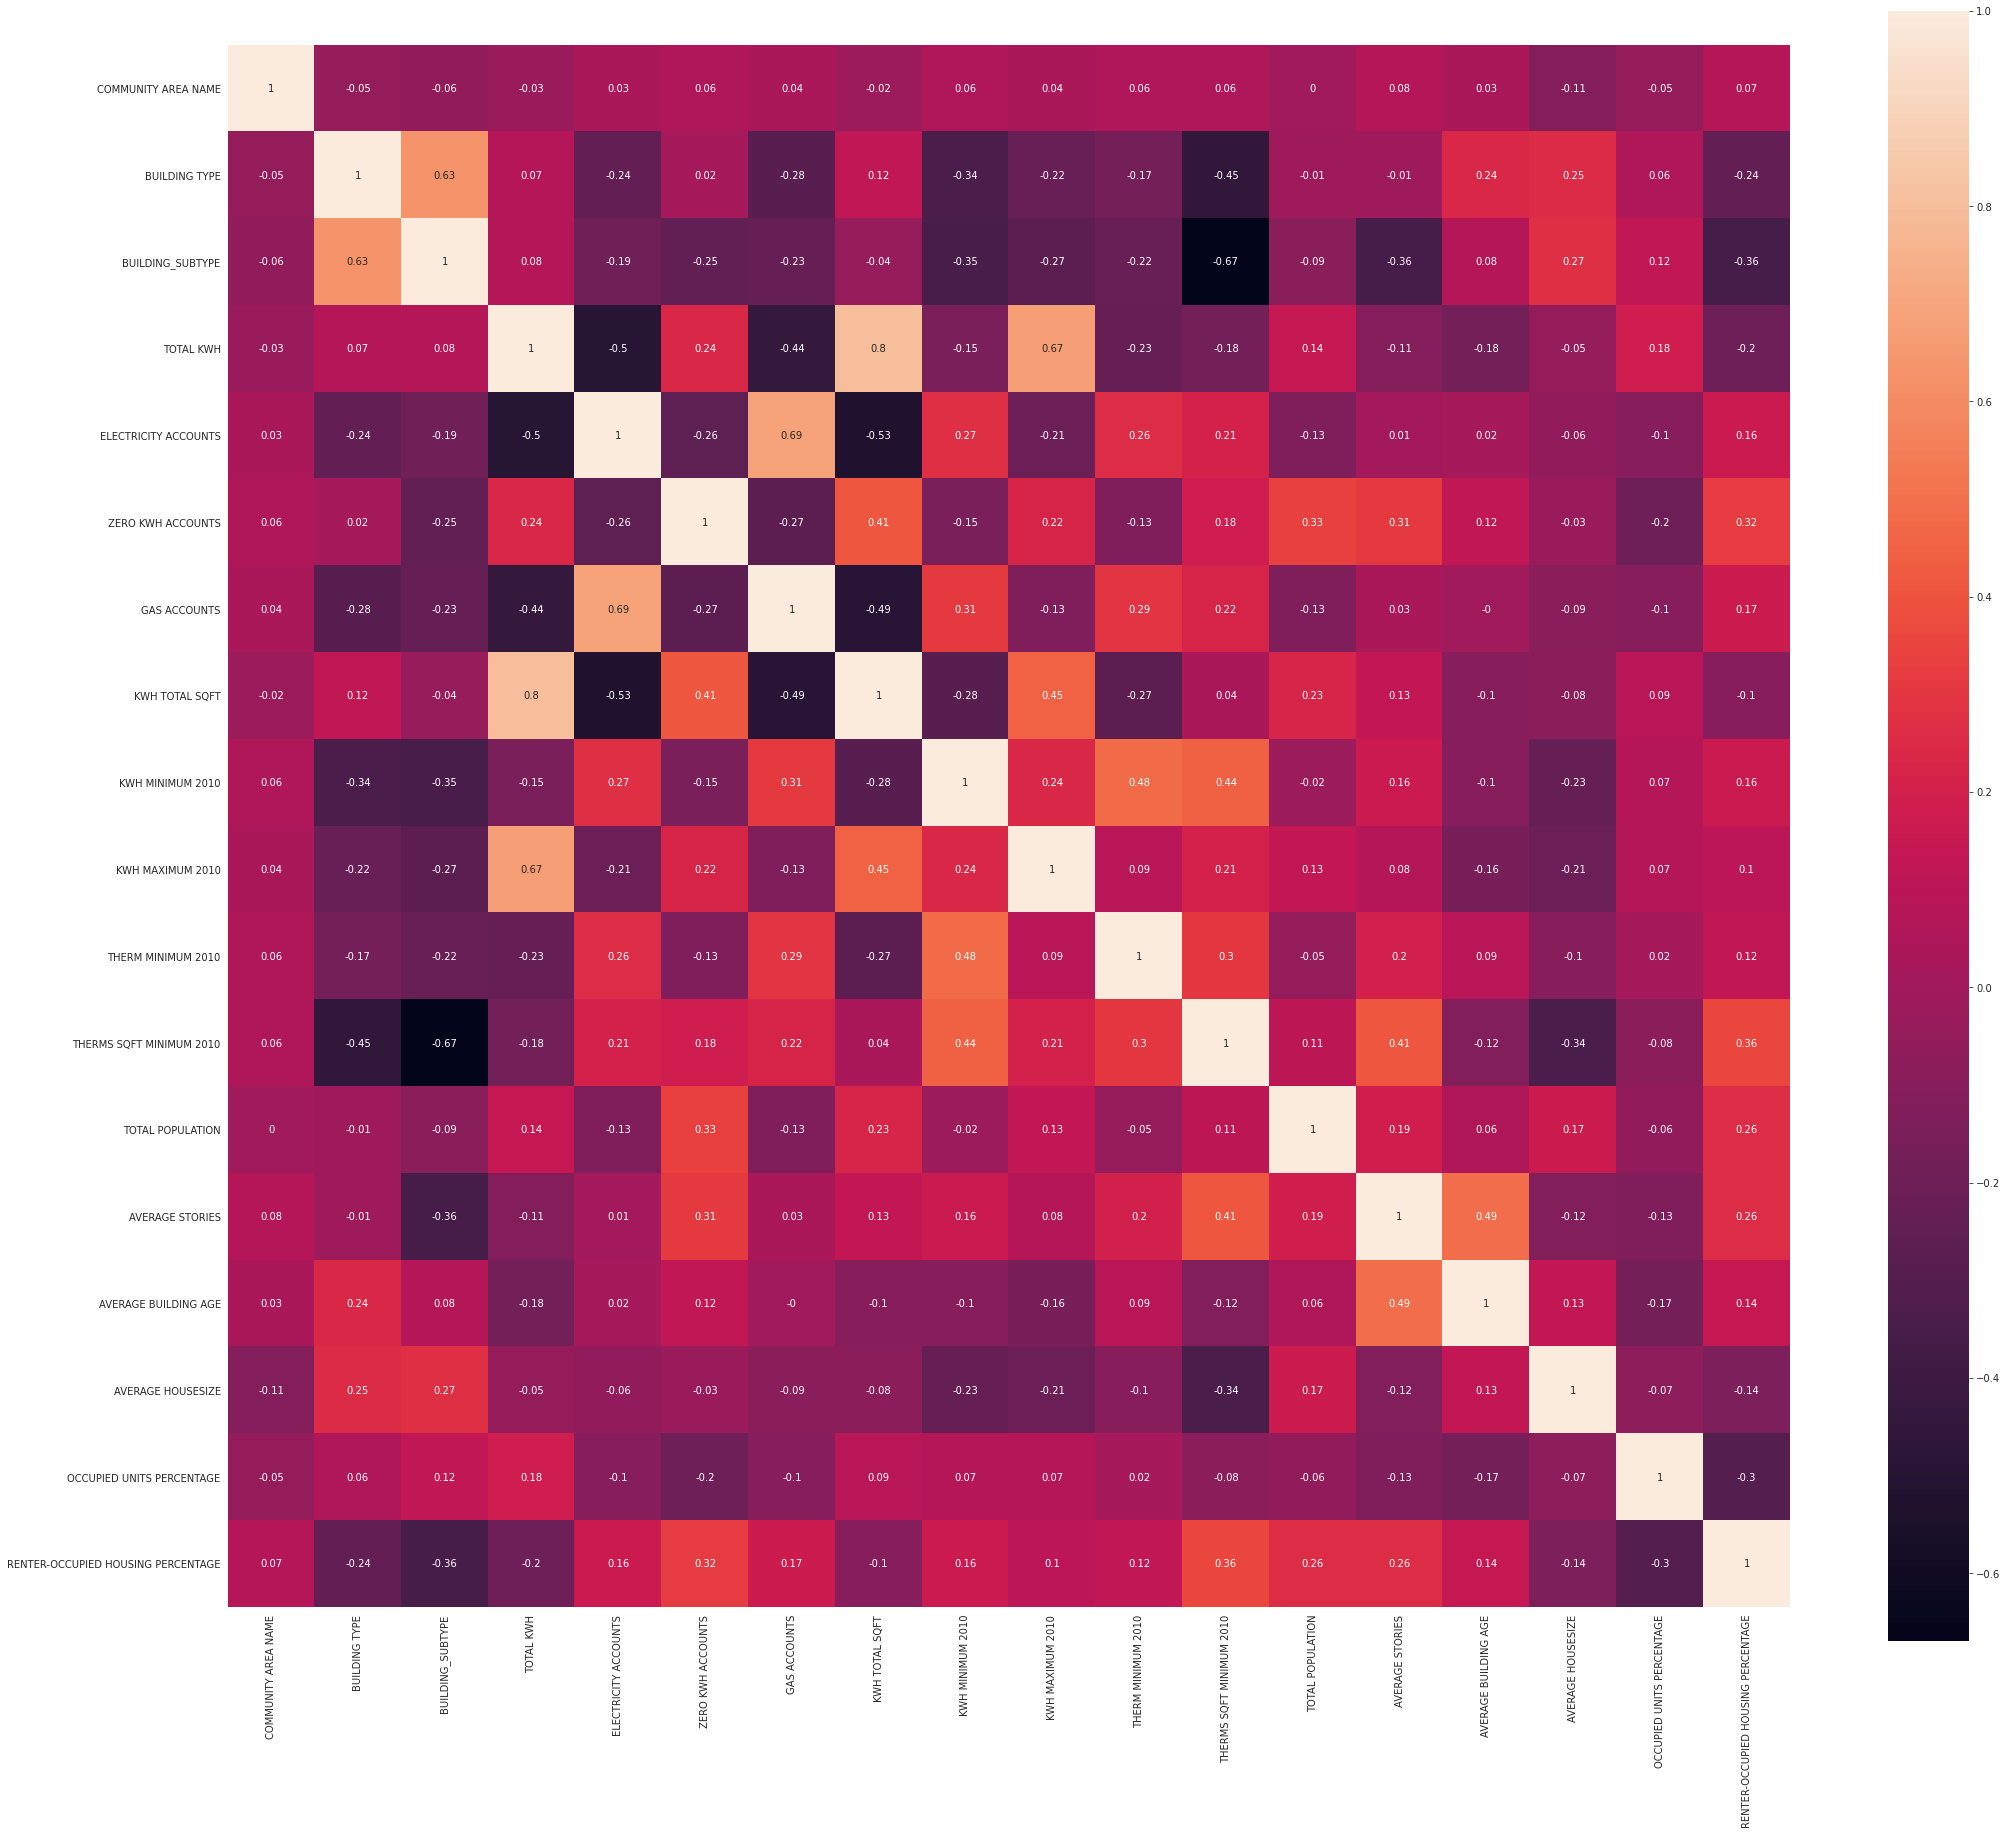

In [0]:
# the heatmap shows that I reduced the amount of highly correlated features which had similar variance
plt.figure(figsize=(35,30))
corrmat=energy_df5.corr(method ='spearman').round(2)
sns.heatmap(corrmat, square=True, annot=True,xticklabels=True, vmax=1, yticklabels=True)

In [0]:
#look at the number of columns left
energy_df5.columns

Index(['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH',
       'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS', 'GAS ACCOUNTS',
       'KWH TOTAL SQFT', 'KWH MINIMUM 2010', 'KWH MAXIMUM 2010',
       'THERM MINIMUM 2010', 'THERMS SQFT MINIMUM 2010', 'TOTAL POPULATION',
       'AVERAGE STORIES', 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE',
       'OCCUPIED UNITS PERCENTAGE', 'RENTER-OCCUPIED HOUSING PERCENTAGE'],
      dtype='object')

In [0]:
energy_df6=energy_df[['COMMUNITY AREA NAME', 'BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH',
       'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS', 'GAS ACCOUNTS',
       'KWH TOTAL SQFT', 'KWH MINIMUM 2010', 'KWH MAXIMUM 2010',
       'THERM MINIMUM 2010', 'THERMS SQFT MINIMUM 2010', 'TOTAL POPULATION',
       'AVERAGE STORIES', 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE',
       'OCCUPIED UNITS PERCENTAGE', 'RENTER-OCCUPIED HOUSING PERCENTAGE']]

In [0]:
#new dataset after sorting out the features using the heatmap and VIF
energy_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   COMMUNITY AREA NAME                 67051 non-null  object 
 1   BUILDING TYPE                       66974 non-null  object 
 2   BUILDING_SUBTYPE                    66974 non-null  object 
 3   TOTAL KWH                           66180 non-null  float64
 4   ELECTRICITY ACCOUNTS                66180 non-null  object 
 5   ZERO KWH ACCOUNTS                   67051 non-null  int64  
 6   GAS ACCOUNTS                        65755 non-null  object 
 7   KWH TOTAL SQFT                      65901 non-null  float64
 8   KWH MINIMUM 2010                    66180 non-null  float64
 9   KWH MAXIMUM 2010                    66180 non-null  float64
 10  THERM MINIMUM 2010                  65755 non-null  float64
 11  THERMS SQFT MINIMUM 2010            65378

In [0]:
#re-format the titles fo simplicity and uniformity to convery to lowercase, remove gaps, etc.
energy_df6.columns = energy_df6.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_').str.replace('(', '').str.replace(')', '')

In [0]:
#look at the numeric columns left
non_numeric_columns=energy_df6.select_dtypes(["float",'int']).columns
print(non_numeric_columns)

Index(['total_kwh', 'zero_kwh_accounts', 'kwh_total_sqft', 'kwh_minimum_2010',
       'kwh_maximum_2010', 'therm_minimum_2010', 'therms_sqft_minimum_2010',
       'total_population', 'average_stories', 'average_building_age',
       'average_housesize', 'occupied_units_percentage',
       'renter-occupied_housing_percentage'],
      dtype='object')


In [0]:

# missing values
#first_drop Columns with a large percentage of null values
total_of_missing=energy_df6.isnull().sum().sort_values(ascending=False)
percent_of_missing=(energy_df6.isnull().sum()/energy_df6.isnull().count()).sort_values(ascending=False)
missing_info=pd.concat([total_of_missing,percent_of_missing], axis=1, keys=['Total', 'Percent'])
missing_info.head(20)


,Total,Percent
renter-occupied_housing_percentage,2618,0.039045
occupied_units_percentage,2445,0.036465
therms_sqft_minimum_2010,1673,0.024951
gas_accounts,1296,0.019329
therm_minimum_2010,1296,0.019329
kwh_total_sqft,1150,0.017151
total_kwh,871,0.012990
electricity_accounts,871,0.012990
kwh_minimum_2010,871,0.012990
kwh_maximum_2010,871,0.012990


In [0]:
#determine whether of not to delete the entire missing values are missing accross the entire row. if so, I would delete
#the entire row but I found that not to be the case.
energy_df6[energy_df6.isnull().any(axis=1)]

,community_area_name,building_type,building_subtype,total_kwh,electricity_accounts,zero_kwh_accounts,gas_accounts,kwh_total_sqft,kwh_minimum_2010,kwh_maximum_2010,therm_minimum_2010,therms_sqft_minimum_2010,total_population,average_stories,average_building_age,average_housesize,occupied_units_percentage,renter-occupied_housing_percentage
0,Archer Heights,Residential,Multi < 7,NaN,NaN,0,11,NaN,NaN,NaN,1061.0,1382.0,89.0,2.0,71.33,3.87,0.9582,0.3910
1,Ashburn,Residential,Multi 7+,82064.0,8,3,NaN,10892.0,8886.0,51815.0,NaN,NaN,112.0,2.0,41.00,1.81,0.9254,0.8059
2,Auburn Gresham,Commercial,Multi < 7,NaN,NaN,7,4,NaN,NaN,NaN,94.0,7347.0,102.0,3.0,86.00,3.00,0.7082,0.6759
3,Austin,Commercial,Multi < 7,NaN,NaN,2,Less than 4,NaN,NaN,NaN,400.0,2146.0,121.0,2.0,84.00,2.95,0.7321,0.7800
4,Austin,Commercial,Multi < 7,NaN,NaN,3,Less than 4,NaN,NaN,NaN,949.0,2146.0,62.0,2.0,85.00,3.26,0.8261,0.5790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66881,Woodlawn,Commercial,Commercial,1233.0,Less than 4,0,NaN,1500.0,1233.0,1233.0,NaN,NaN,64.0,2.0,117.00,3.05,0.7778,0.6670
66933,Woodlawn,Residential,Multi 7+,22313.0,4,4,6,NaN,22313.0,22313.0,2275.0,9192.0,160.0,3.0,107.00,2.86,0.7089,0.6609
67024,Woodlawn,Residential,Multi 7+,714068.0,220,23,NaN,784071.0,714068.0,714068.0,NaN,NaN,0.0,21.0,40.00,0.00,NaN,NaN
67033,Woodlawn,Commercial,Multi < 7,43758.0,8,2,6,NaN,43758.0,43758.0,2621.0,9762.0,69.0,3.0,104.00,2.76,0.7576,0.4800


In [0]:
#remaining object type variables. I will use one hot encoding to convert them to numeric categorical variables
non_numeric_columns=energy_df6.select_dtypes(['object']).columns
print(non_numeric_columns)

Index(['community_area_name', 'building_type', 'building_subtype',
       'electricity_accounts', 'gas_accounts'],
      dtype='object')


For the missing categorical variables, I filled the missing values with a new label

In [0]:

energy_df6["community_area_name"].fillna("unknown_community_area_name", inplace = True)
energy_df6["building_type"].fillna("unknown_building_type", inplace = True)
energy_df6["building_subtype"].fillna("unknown_building_subtype", inplace = True)
energy_df6["gas_accounts"].fillna("unknown_gas_accounts", inplace = True)
energy_df6["electricity_accounts"].fillna("unknown_electricity_accounts", inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
energy_df6['building_type'].unique()

array(['Residential', 'Commercial', 'Industrial', 'unknown_building_type'],
      dtype=object)

In [0]:
#cheching if we got rid of the missing categorical variables so far
energy_df6.isnull().sum()

community_area_name                      0
building_type                            0
building_subtype                         0
total_kwh                              871
electricity_accounts                     0
zero_kwh_accounts                        0
gas_accounts                             0
kwh_total_sqft                        1150
kwh_minimum_2010                       871
kwh_maximum_2010                       871
therm_minimum_2010                    1296
therms_sqft_minimum_2010              1673
total_population                        14
average_stories                          0
average_building_age                     0
average_housesize                       14
occupied_units_percentage             2445
renter-occupied_housing_percentage    2618
dtype: int64

In [0]:
num_columns=['total_kwh', 'zero_kwh_accounts', 'kwh_total_sqft', 'kwh_minimum_2010',
       'kwh_maximum_2010', 'therm_minimum_2010', 'therms_sqft_minimum_2010',
       'total_population', 'average_stories', 'average_building_age',
       'average_housesize', 'occupied_units_percentage',
       'renter-occupied_housing_percentage']

In [0]:
continuous=energy_df6[['total_kwh', 'zero_kwh_accounts', 'kwh_total_sqft', 'kwh_minimum_2010',
       'kwh_maximum_2010', 'therm_minimum_2010', 'therms_sqft_minimum_2010',
       'total_population', 'average_stories', 'average_building_age',
       'average_housesize', 'occupied_units_percentage',
       'renter-occupied_housing_percentage']]

Distribution of the continuous variables. I discovered that none of these features follows a normal distribution. Therefore, in my further clustering analysis, I did not use the GMM method as it requires normally distributed variables. Below are histoframs for all the continuous variables.


In [0]:
# distribution of the continuous variables
def histograms_plot(dataframe, features, rows, cols):
 fig=plt.figure(figsize=(20,20))
 for i, feature in enumerate(features):
     ax=fig.add_subplot(rows,cols,i+1)
     dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
     ax.set_title(feature+" Distribution",color='red')

 fig.tight_layout()  
 plt.show()

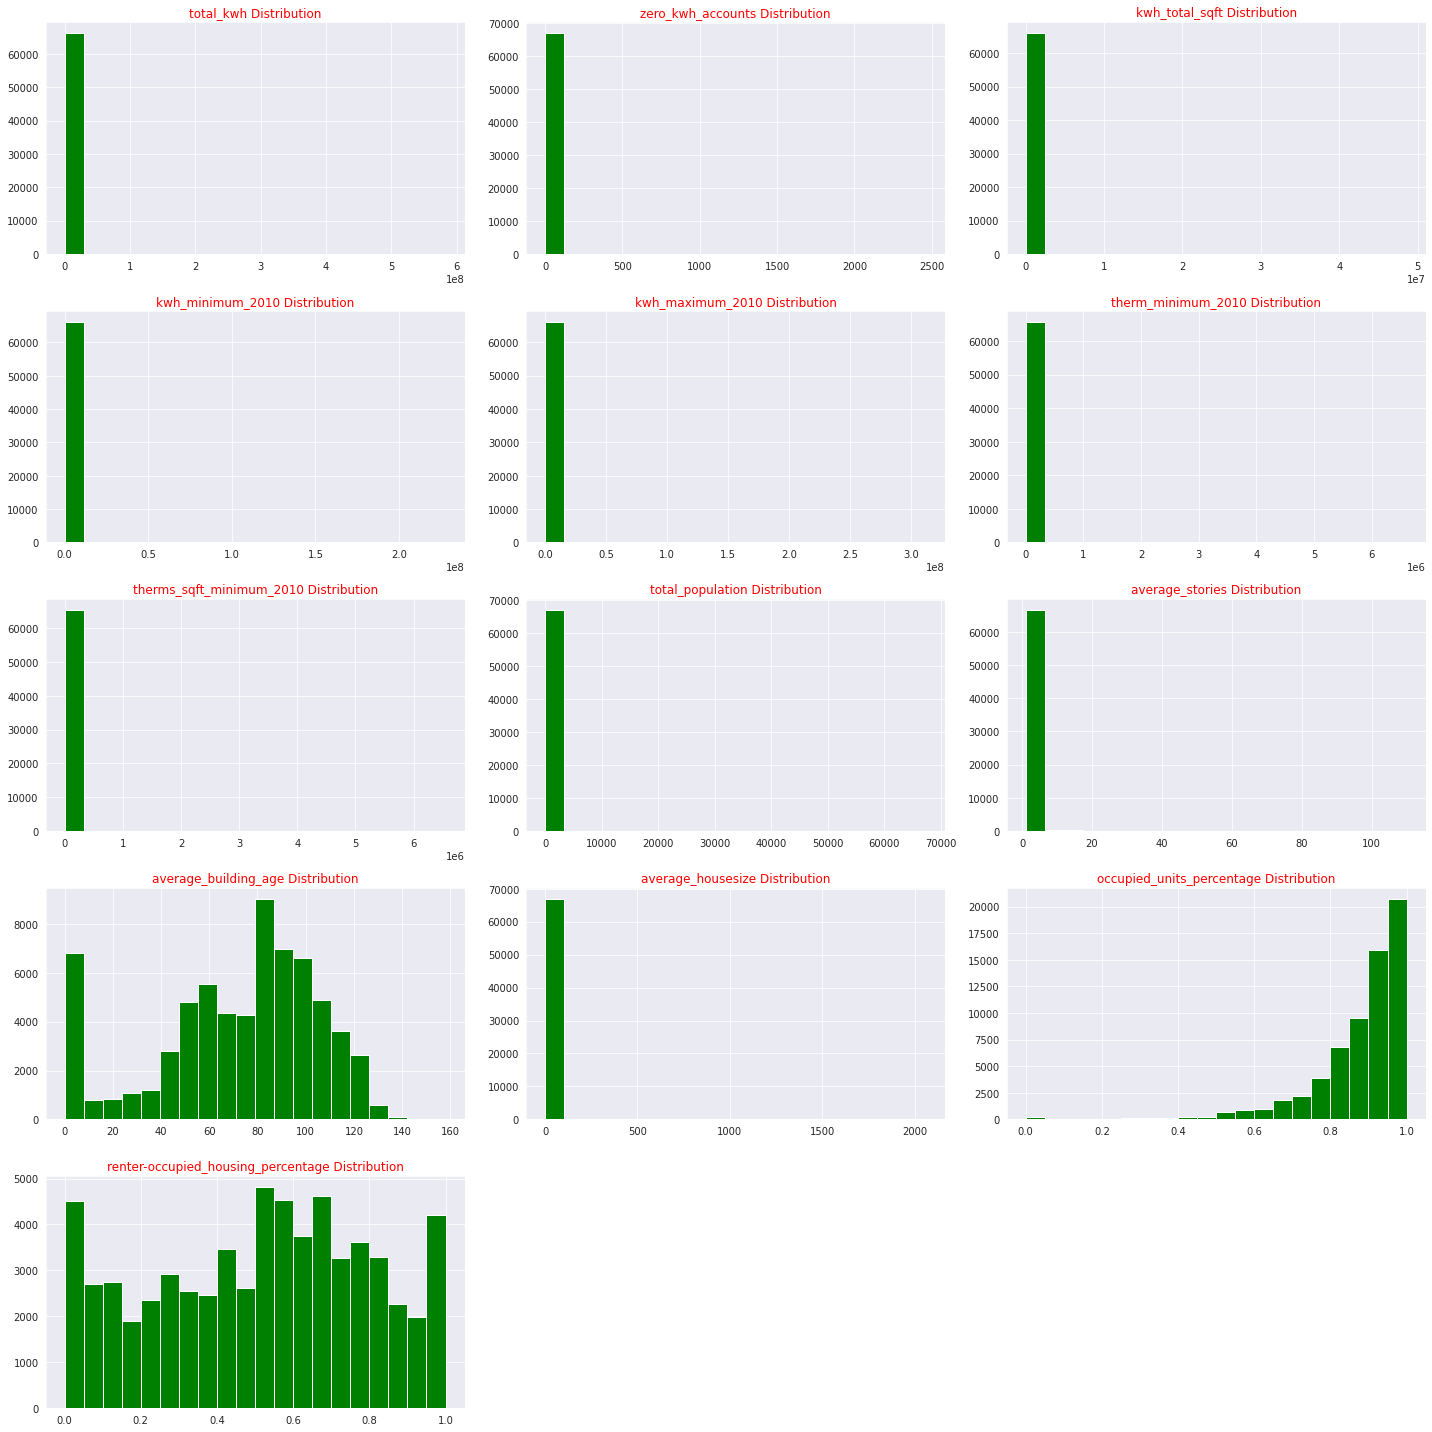

In [0]:
histograms_plot(continuous,continuous.columns,5,3)

Since the distribution is not a normal one, and since the remaining percentageof missing continuous features is about 3%, used multiple imputation using the median to fill in the remaining missing values.

In [0]:
#fillna
energy_df7=energy_df6.copy()
for col in num_columns:
      energy_df7[col].fillna(energy_df7[col].median(), inplace=True)

In [0]:
energy_df7['building_subtype'].nunique()

7

<b>Outliers</b>

I used the boxplot to visualize the outliers

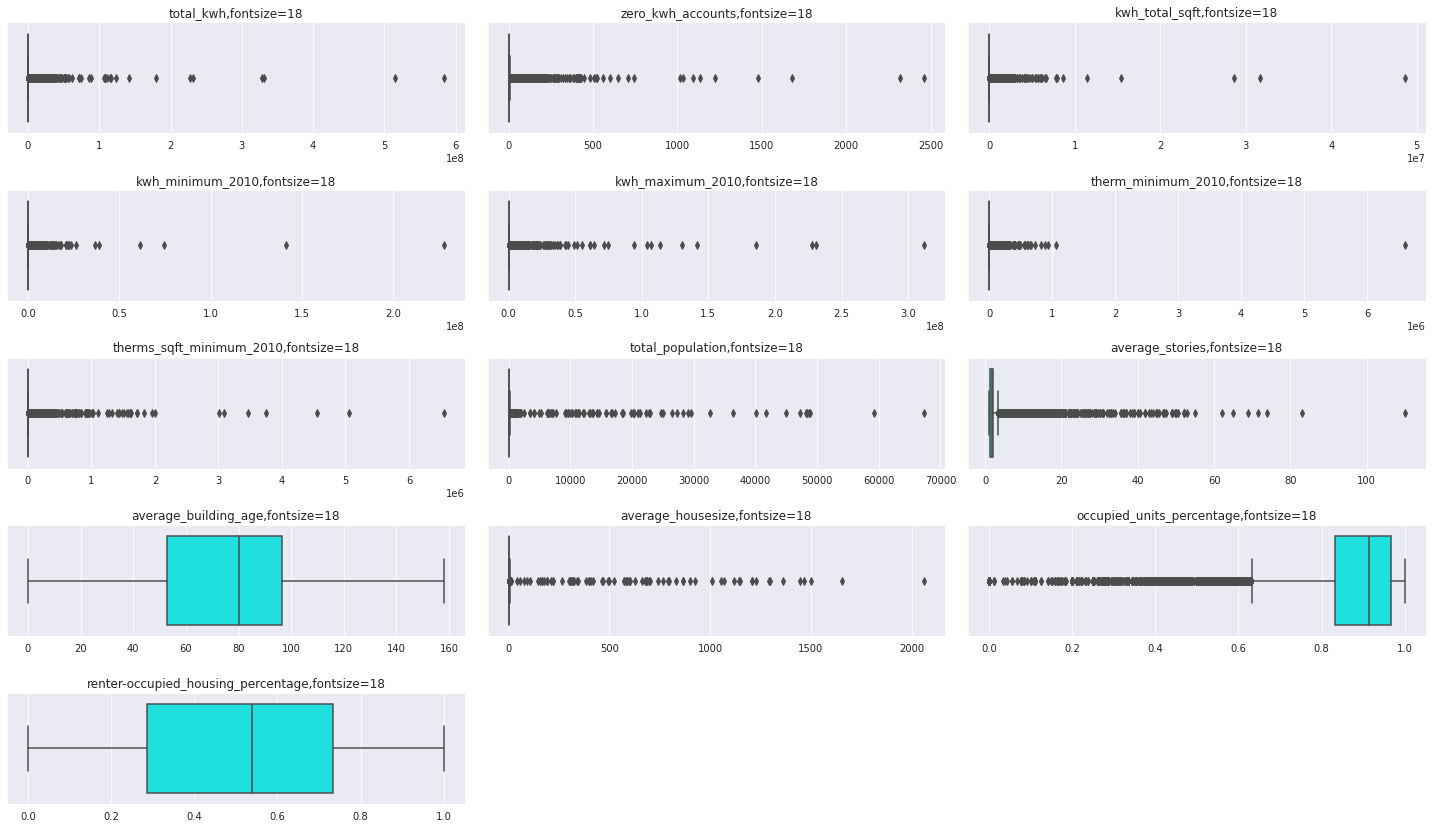

In [0]:
#Detecting otliers.
#We draw the boxplot to detect outliers
plt.figure(figsize=(20,30))
for i, col in enumerate(num_columns):
  plt.subplot(len(num_columns), 3, i+1)
  sns.boxplot(energy_df6[col], color=('cyan'))
  plt.title(f'{col},fontsize=18')
  plt.xlabel('')

plt.tight_layout()
plt.show()

So I do have outliers in the data, but most clustering algorithms are able to handle outliers. So I will not use any outlier removal techniques.


In [0]:
#taking a look at the remaining categorical variables
energy_df=energy_df7.copy()
categorical = energy_df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

community_area_name
77
building_type
4
building_subtype
7
electricity_accounts
379
gas_accounts
211


In [0]:
#electricity accounts and gas accounts will be deleted because they are
#just too many and not truly necessary for my analysis

In [0]:
energy_df=energy_df.drop(['electricity_accounts','gas_accounts'], axis=1)

In the following section, I visualize the top ten community areas of highest energy consumption and the bottom 10 areas of energy consumption to try to differentiate the differences in magnitude. I also break down the data according to building type among the top 10 and bottom 10.

In [0]:
#Aggregating by commmunity area name
dfg=energy_df3.groupby(['COMMUNITY AREA NAME']).sum()

In [0]:
dfg.head()

,TOTAL KWH,ZERO KWH ACCOUNTS,TOTAL THERMS,KWH TOTAL SQFT,THERMS TOTAL SQFT,KWH MINIMUM 2010,KWH MAXIMUM 2010,KWH SQFT MEAN 2010,KWH SQFT MAXIMUM 2010,THERM MINIMUM 2010,THERM MAXIMUM 2010,THERMS SQFT MEAN 2010,THERMS SQFT MINIMUM 2010,THERMS SQFT MAXIMUM 2010,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
COMMUNITY AREA NAME,,,,,,,,,,,,,,,,,,,,,,,
Albany Park,128269250.0,5482,17256806.0,18543563.0,18357636.0,9987920.0,48536051.0,5504778.93,7053454.0,1691853.0,6440912.0,5539781.18,4572405.0,7099590.0,145619.0,52066.0,2092.07,82331.91,4168.27,1032.6859,30115.0,646.9883,46871.0
Archer Heights,114586823.0,781,7889224.0,7806322.0,9661580.0,6708414.0,72451618.0,1916569.94,3149568.0,654713.0,2867709.0,2184599.85,1267834.0,3888878.0,29591.0,9651.0,594.88,24096.87,1489.08,333.7608,3835.0,155.5279,8773.0
Armour Square,69310555.0,1287,5573445.0,6854119.0,6803936.0,10245691.0,43034825.0,2573690.63,3186384.0,747005.0,2246365.0,2434179.70,2084415.0,3100902.0,35884.0,14838.0,532.08,16630.31,888.04,236.7815,9015.0,157.3031,13660.0
Ashburn,167157321.0,1494,16128026.0,17405669.0,17298889.0,5324900.0,54721812.0,2105448.58,3886811.0,978761.0,2537789.0,1949553.02,1413699.0,3768756.0,63033.0,21257.0,1173.39,43240.34,3335.43,800.1712,3508.0,128.9627,20033.0
Auburn Gresham,140365361.0,5639,24018573.0,21323656.0,20413696.0,11726898.0,38179610.0,4604749.61,6057238.0,1821018.0,7095777.0,4127439.01,3492592.0,5455434.0,111768.0,48218.0,2227.19,99460.46,5067.91,1186.7274,24217.0,668.9451,41229.0


In [0]:
dfg.nlargest(10, 'TOTAL KWH')
largk=dfg.nlargest(10, 'TOTAL KWH').index
print(largk)
e1=energy_df3[energy_df3['COMMUNITY AREA NAME'].isin(largk)]

Index(['Loop', 'Near North Side', 'Near West Side', 'Near South Side',
       'Woodlawn', 'Lakeview', 'Lincoln Park', 'West Town', 'Austin',
       'South Lawndale'],
      dtype='object', name='COMMUNITY AREA NAME')


In [0]:
dfg.nsmallest(10, 'TOTAL THERMS')
smallt=dfg.nsmallest(10, 'TOTAL THERMS').index
print(smallt)
e2=energy_df3[energy_df3['COMMUNITY AREA NAME'].isin(smallt)]

Index(['Fuller Park', 'Burnside', 'Oakland', 'Hegewisch', 'Washington Park',
       'Riverdale', 'O'Hare', 'Montclare', 'Armour Square', 'Edison Park'],
      dtype='object', name='COMMUNITY AREA NAME')


Notable is the difference in magnitude among the top 10 and bottom 10. The top 10 used a magnitude of 1e7 while the bottom 10 uses a magnitude of 1e6.


Text(0.5, 1.0, 'Area which consume the lowest kwh')

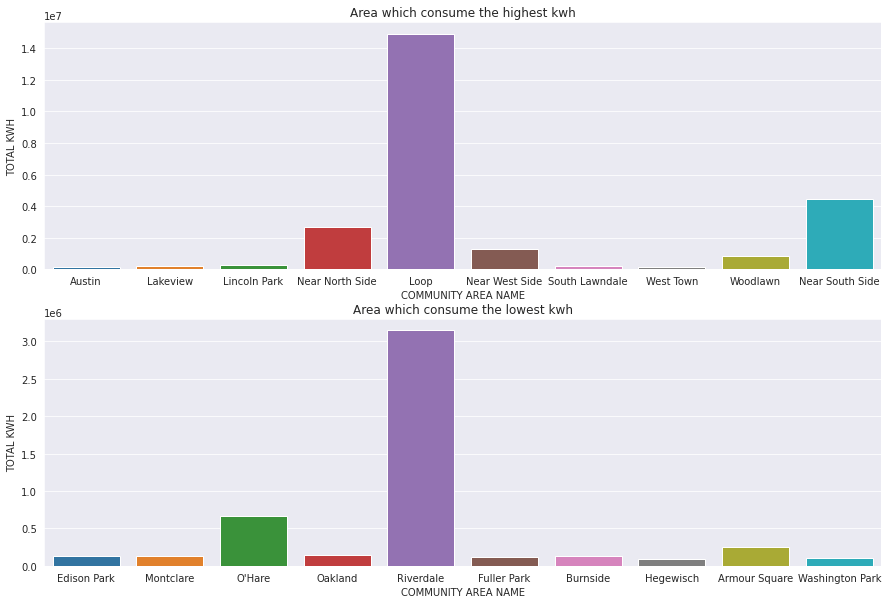

In [0]:
fig, axs = plt.subplots(nrows=2,figsize=(15,10))
sns.barplot(x='COMMUNITY AREA NAME',y='TOTAL KWH',data=e1, ax=axs[0], ci=None)
sns.barplot(x='COMMUNITY AREA NAME',y='TOTAL KWH',data=e2, ax=axs[1], ci=None)


axs[0].set_title("Area which consume the highest kwh")

axs[1].set_title("Area which consume the lowest kwh")

I also make comparisons of the top 10 and bottom 10 while looking at the building type. For both groups, the commercial is the largest consumer, followed by industrial and then residential. Also it's interesting that there are barely any industrial type in the bottom 10.

Text(0.5, 1.0, 'Area which consume less power')

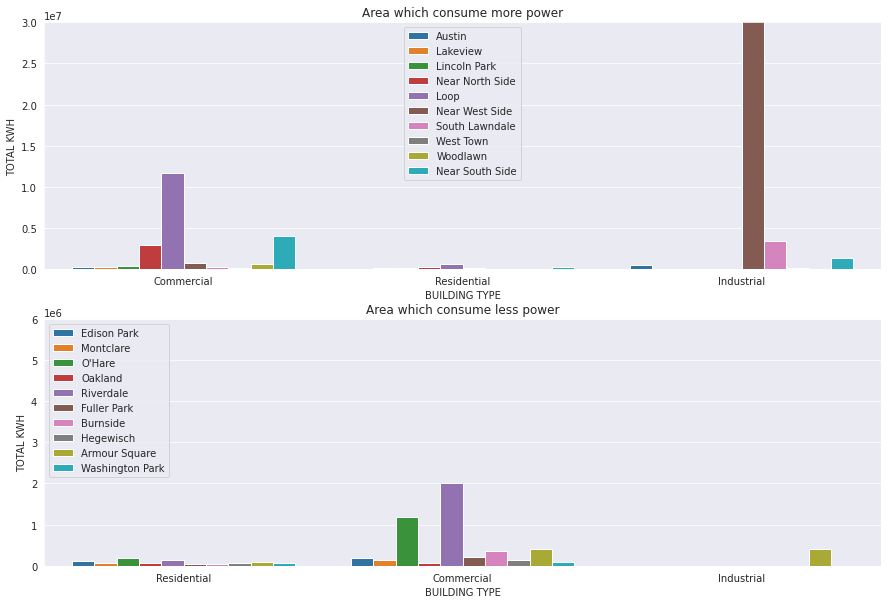

In [0]:
fig, axs = plt.subplots(nrows=2,figsize=(15,10))
sns.barplot(x=e1['BUILDING TYPE'],y=e1['TOTAL KWH'],hue=e1['COMMUNITY AREA NAME'], ax=axs[0], ci=None)
sns.barplot(x=e2['BUILDING TYPE'],y=e2['TOTAL KWH'],hue=e2['COMMUNITY AREA NAME'], ax=axs[1], ci=None)

axs[0].legend(loc='upper right')
axs[0].set_ylim(0,30000000)
axs[0].set_title("Area which consume more power")
axs[0].legend(loc=0)

axs[1].legend(loc=0)
axs[1].set_ylim(0,6000000)
axs[1].set_title("Area which consume less power")

In [0]:
#I have successfully taken care of the null values
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   community_area_name                 67051 non-null  object 
 1   building_type                       67051 non-null  object 
 2   building_subtype                    67051 non-null  object 
 3   total_kwh                           67051 non-null  float64
 4   zero_kwh_accounts                   67051 non-null  int64  
 5   kwh_total_sqft                      67051 non-null  float64
 6   kwh_minimum_2010                    67051 non-null  float64
 7   kwh_maximum_2010                    67051 non-null  float64
 8   therm_minimum_2010                  67051 non-null  float64
 9   therms_sqft_minimum_2010            67051 non-null  float64
 10  total_population                    67051 non-null  float64
 11  average_stories                     67051

In [0]:
#apply label encoding for the collumity area name because it has 77 labels
energy_df['community_area_name'] =  label_encoder.fit_transform(energy_df['community_area_name'])

In [0]:
energy_df

,community_area_name,building_type,building_subtype,total_kwh,zero_kwh_accounts,kwh_total_sqft,kwh_minimum_2010,kwh_maximum_2010,therm_minimum_2010,therms_sqft_minimum_2010,total_population,average_stories,average_building_age,average_housesize,occupied_units_percentage,renter-occupied_housing_percentage
0,1,Residential,Multi < 7,62341.5,0,10873.0,4370.0,18044.0,1061.0,1382.0,89.0,2.00,71.33,3.87,0.9582,0.3910
1,3,Residential,Multi 7+,82064.0,3,10892.0,8886.0,51815.0,989.0,1520.0,112.0,2.00,41.00,1.81,0.9254,0.8059
2,4,Commercial,Multi < 7,62341.5,7,10873.0,4370.0,18044.0,94.0,7347.0,102.0,3.00,86.00,3.00,0.7082,0.6759
3,5,Commercial,Multi < 7,62341.5,2,10873.0,4370.0,18044.0,400.0,2146.0,121.0,2.00,84.00,2.95,0.7321,0.7800
4,5,Commercial,Multi < 7,62341.5,3,10873.0,4370.0,18044.0,949.0,2146.0,62.0,2.00,85.00,3.26,0.8261,0.5790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67046,76,Residential,Single Family,27654.0,7,7801.0,2444.0,14932.0,272.0,2890.0,116.0,1.00,0.00,3.14,0.6727,0.7030
67047,76,Commercial,Multi < 7,41977.0,5,11838.0,10754.0,16647.0,42.0,5406.0,31.0,3.00,104.50,2.07,0.6250,0.8670
67048,76,Residential,Multi < 7,48850.0,2,11028.0,7010.0,33590.0,2449.0,2800.0,31.0,2.33,100.67,2.07,0.6250,0.8670
67049,76,Residential,Single Family,17707.0,9,4653.0,1878.0,7179.0,49.0,4653.0,0.0,1.00,0.00,0.00,0.9146,0.5379


After dealing with the null values< I applied one hot encoding on the remaining object type variables so that my dataset before clustering only contains numerical data.

In [0]:
energy_dfx=energy_df.copy()
#apply one hot encoding for the rest of the categorical columns
cat_vars=['building_type','building_subtype']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(energy_dfx[var], prefix=var)
    data1=energy_dfx.join(cat_list)
    energy_dfx=data1
cat_vars=['building_type','building_subtype']
data_vars=energy_dfx.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [0]:
energy_df=energy_dfx[to_keep]

In [0]:
energy_df.head()

,community_area_name,total_kwh,zero_kwh_accounts,kwh_total_sqft,kwh_minimum_2010,kwh_maximum_2010,therm_minimum_2010,therms_sqft_minimum_2010,total_population,average_stories,average_building_age,average_housesize,occupied_units_percentage,renter-occupied_housing_percentage,building_type_Commercial,building_type_Industrial,building_type_Residential,building_type_unknown_building_type,building_subtype_Commercial,building_subtype_Industrial,building_subtype_Multi 7+,building_subtype_Multi < 7,building_subtype_Municipal,building_subtype_Single Family,building_subtype_unknown_building_subtype
0,1,62341.5,0,10873.0,4370.0,18044.0,1061.0,1382.0,89.0,2.0,71.33,3.87,0.9582,0.3910,0,0,1,0,0,0,0,1,0,0,0
1,3,82064.0,3,10892.0,8886.0,51815.0,989.0,1520.0,112.0,2.0,41.00,1.81,0.9254,0.8059,0,0,1,0,0,0,1,0,0,0,0
2,4,62341.5,7,10873.0,4370.0,18044.0,94.0,7347.0,102.0,3.0,86.00,3.00,0.7082,0.6759,1,0,0,0,0,0,0,1,0,0,0
3,5,62341.5,2,10873.0,4370.0,18044.0,400.0,2146.0,121.0,2.0,84.00,2.95,0.7321,0.7800,1,0,0,0,0,0,0,1,0,0,0
4,5,62341.5,3,10873.0,4370.0,18044.0,949.0,2146.0,62.0,2.0,85.00,3.26,0.8261,0.5790,1,0,0,0,0,0,0,1,0,0,0


In [0]:
#now the dataset only contains numerical data and is ready for clustering
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   community_area_name                        67051 non-null  int64  
 1   total_kwh                                  67051 non-null  float64
 2   zero_kwh_accounts                          67051 non-null  int64  
 3   kwh_total_sqft                             67051 non-null  float64
 4   kwh_minimum_2010                           67051 non-null  float64
 5   kwh_maximum_2010                           67051 non-null  float64
 6   therm_minimum_2010                         67051 non-null  float64
 7   therms_sqft_minimum_2010                   67051 non-null  float64
 8   total_population                           67051 non-null  float64
 9   average_stories                            67051 non-null  float64
 10  average_building_age  

**<h2>Hierarchical Clustering</h2>**

In order to get a better understanding of the clusters and whether or not HCA will be suitable, I begin by using a dendogram to understand if Hierarchical clustering would be a useful approach and to get a better understading of any potential clusters.

---



In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage

I subsampled the dataset to only use 10% of the initial dataset for HCA because the machine kept crashing when I tried to draw the dendogram or do any hierarchical clustering of any kind due to insufficient RAM


In [0]:
#subsample the data to obtain only 25&
X_sample=energy_df.sample(frac =.10) 
X_sample.shape

(6705, 25)

In [0]:
scaler = StandardScaler()
X_sam_std = scaler.fit_transform(X_sample)

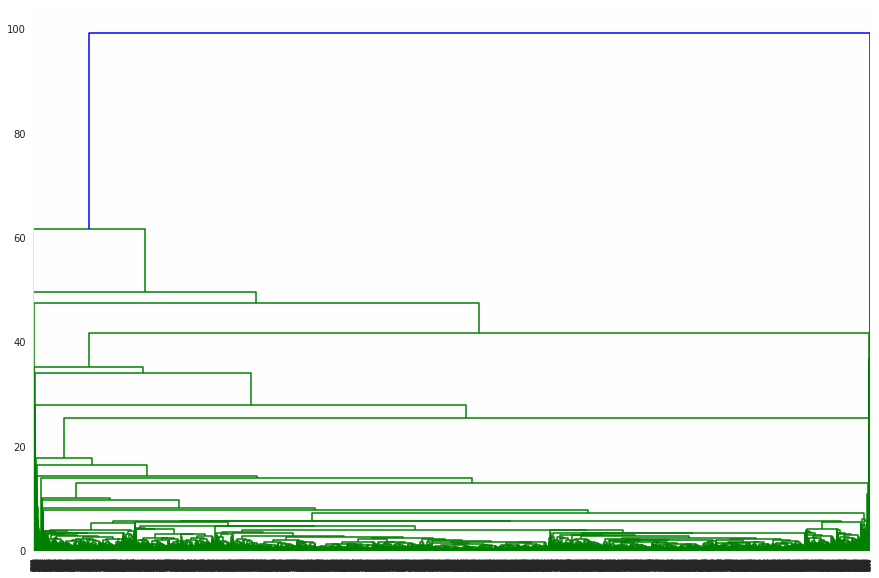

In [0]:
#Dendogram
plt.figure(figsize=(15,10))
dendrogram(linkage(X_sam_std, method='average'))
plt.show()

What the dendogram shows is that the HCA method would not be suitable because it was unable to come out with distinct clusters. This leaves us with other methods like DBCSCAN and K_means

In [0]:
energy_df.shape

(67051, 25)

**<h2>DBSCAN</h2>**

I used the DMSCAN first because I can figure out the number of clusters. DBSCAN has 2 hyperparameters; epsilon and minpoints. To find the eps, I used the KNN plot to generate the elbow curve below, which I can then read off the optimum eps from.

In [0]:
# introduce the dataset as X and standardize it since most of our algorithms work with standardized data
X = energy_df

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


KNN plot to determine the optimal eps for DBSCAN



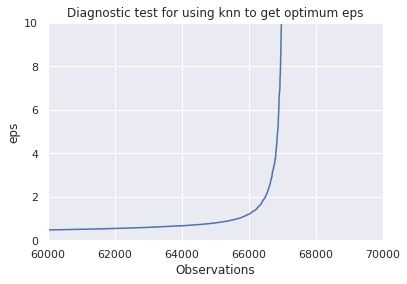

In [0]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(60000, 70000)
plt.ylim(0, 10)
plt.xlabel("Observations")
plt.ylabel("eps")
plt.title('Diagnostic test for using knn to get optimum eps')
plt.show()

I obtained the optimum value pf eps as 2. Using DBSCAN, I them iterate over different min samples to figure out which one performed best by looking at the silhouette score and also to obtain the number of clusters to use for other algorithms

In [0]:
for x in [ 11, 16, 21,26, 40, 60, 80, 100]:
  db = DBSCAN(eps=2, min_samples=x, n_jobs=-1)
  clusters=db.fit_predict(X_std)
  print("The silhouette score of the DBSCAN solution with min_samples= {} is : {}"
      .format(x,metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("The number of clusters for this solution is : {}.".format(len(np.unique(clusters))))

The silhouette score of the DBSCAN solution with min_samples= 11 is : 0.3741636803128513
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 16 is : 0.3739308182576583
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 21 is : 0.3737030860620429
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 26 is : 0.37343283924809223
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 40 is : 0.37244288286022664
The number of clusters for this solution is : 8.
The silhouette score of the DBSCAN solution with min_samples= 60 is : 0.3721358741363379
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 80 is : 0.3710871453776024
The number of clusters for this solution is : 8.
The silhouette score of the DBSC

In [0]:
for x in [ 6,7,8,9,10]:
  db = DBSCAN(eps=2, min_samples=x)
  clusters=db.fit_predict(X_std)
  print("The silhouette score of the DBSCAN solution with min_samples= {} is : {}"
      .format(x,metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print("The number of clusters for this solution is : {}.".format(len(np.unique(clusters))))

The silhouette score of the DBSCAN solution with min_samples= 6 is : 0.3743380382123391
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 7 is : 0.37431207512311576
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 8 is : 0.37426911760290776
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 9 is : 0.37423776187865654
The number of clusters for this solution is : 9.
The silhouette score of the DBSCAN solution with min_samples= 10 is : 0.3741690973133116
The number of clusters for this solution is : 9.


The number of clusters is 9 with the optimum eps being 2 and silhouette score 0.374. I can then do K-means because now I know the number of clusters to use.


In [0]:
db = DBSCAN(eps=2, min_samples=11)
clusters1=db.fit_predict(X_std)

In [0]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("The number of clusters is : {}.".format(len(np.unique(clusters1))))
      

The silhouette score of the DBSCAN solution: 0.3741690973133116
The number of clusters is : 9.


In [0]:
clusters1 = db.labels_

I used the vectorizer method to visualize the clustering. The results were not good.

In [0]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

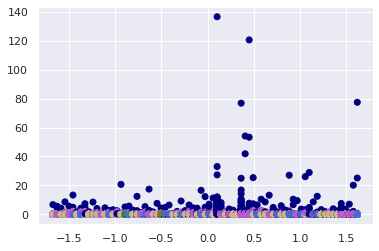

In [0]:
plt.scatter(X_std[:,0], X_std[:,1], c=vectorizer(clusters1))

I used PCA to visualize the clustering in 2 dimensions.

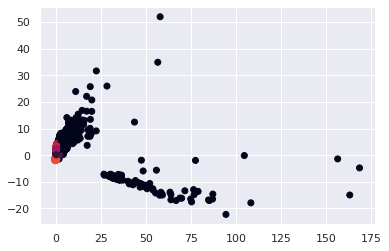

In [0]:
X_pca = PCA(2).fit_transform(X_std)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters1)

**<h2>UMAP for dimension reduction</h2>**

I used UMAP for dimension reduction to attempt to visualize the clusters in a reduced dimension.

Iterating over different n-neighbors

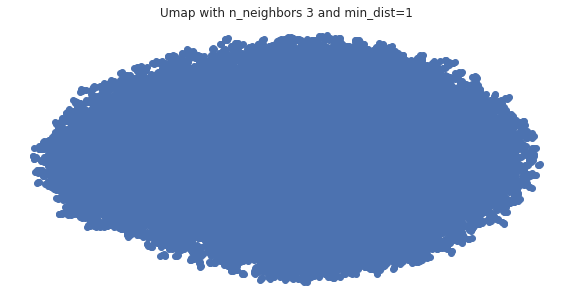

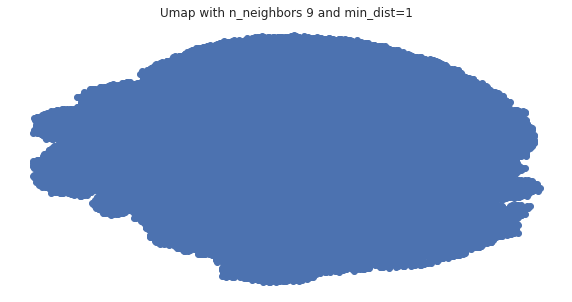

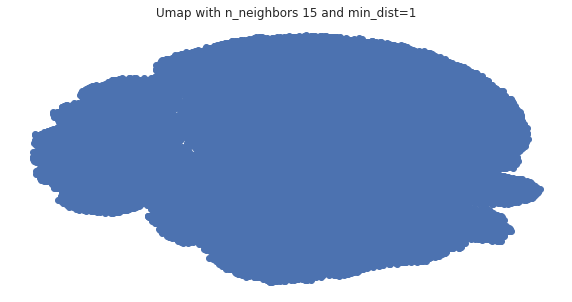

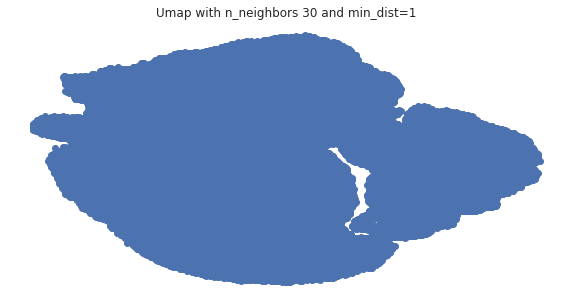

In [0]:
for n in [3, 9, 15, 30 ]:
 umap_results = umap.UMAP(n_neighbors=n,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

 plt.figure(figsize=(10,5))
 plt.title("Umap with n_neighbors {} and min_dist=1".format(n))
 plt.scatter(umap_results[:, 0], umap_results[:, 1])
 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

From the visualization, none of the iterations really gave distinct clusters.

Iterating over different values of min_distance

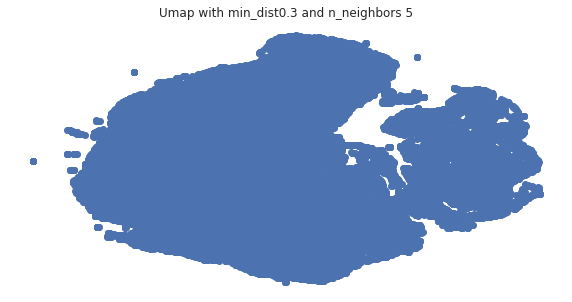

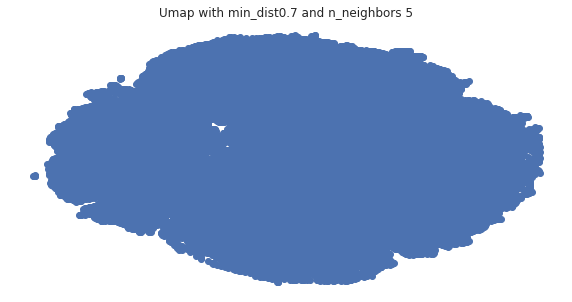

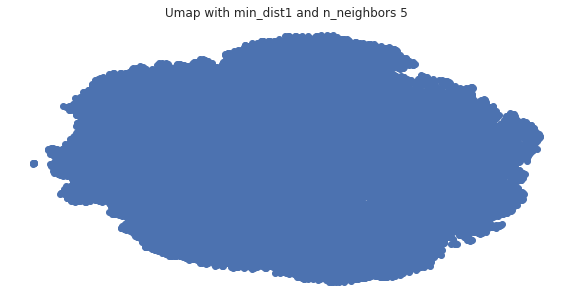

In [0]:
for min in [0.3, 0.7, 1 ]:
 umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=min,
                      metric='correlation').fit_transform(X)

 plt.figure(figsize=(10,5))
 plt.title("Umap with min_dist{} and n_neighbors 5".format(min))
 plt.scatter(umap_results[:, 0], umap_results[:, 1])
 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

Obviously, we could go further and look at different metrics. But that is not the focus of my study. The coclusion is that umap was not effective in delineating the clusters even in a reduced dimension.

**<h2>K-Means</h2>**

K-means only requires the number of clusters as a hyperparameter. I already identified the number of clusters as 9. However, I will run the k-means with other cluster numbers also just to makes sure that 9 is the optimum number.

In [0]:
cluster_numbers=[ 6,7,8,9,10]
kmeans_clusters=[]
for i in cluster_numbers:
 k_means=KMeans(n_clusters=i, random_state=455)
 y_pred=k_means.fit_predict(X_std)   
 kmeans_clusters.append(k_means.fit_predict(X_std))
 print("For number of clusters= {}".format(i))
 print("Silhouette score: {}".format(metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
  print("CH score: {}".format(metrics.calinski_harabasz_score(X_std, y_pred)))

For number of clusters= 6
Silhouette score: 0.3130827620460847
For number of clusters= 7
Silhouette score: 0.28714666885881457
For number of clusters= 8
Silhouette score: 0.32507430746152505
For number of clusters= 9
Silhouette score: 0.36035620974321564
For number of clusters= 10
Silhouette score: 0.33217727218867593


Just as I determined from the DBSCAN , the silhouette score is highest when we have 9 clusters.

In [0]:
k_means= KMeans(n_clusters=9, random_state=123)
clust=k_means.fit_predict(X_std) 
k_means_labels=k_means.labels_

I use PCA to visualize the results in 2 dimesions.

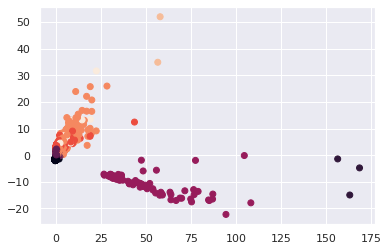

In [0]:
X_pca = PCA(2).fit_transform(X_std)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clust)
plt.show()


Visually it appears like 2 clusters or 3 but one of the main clusters contains the 8 others.


The visualization also did not provide sufficient visusl distinction of the clusters. Below,I use .labels_ to try to figure out what the clusters mean.

In [0]:
k_means.fit_predict(X_std) 
X['kmeans_energy'] = k_means.labels_
X['kmeans_age'] = k_means.labels_
X['kmeans_type'] = k_means.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**<h2>Exploring the clusters</h2>**



I have cited the building age and the energy consumption as the features I want to look at.

<b>Average Building Age Categorized</b>




I categorized the avarage building age into different groups of 40 years. I then compared the generated clusters to the initial dataset to identify what the clusters mean with respect to building age.

In [0]:
energy_df00=energy_df.copy()
energy_df00["average_building_age"].describe()

count    67051.000000
mean        71.593006
std         34.168384
min          0.000000
25%         53.000000
50%         80.000000
75%         96.500000
max        158.000000
Name: average_building_age, dtype: float64

In [0]:
def new_age(x):
    if x>=120:
        return "above 120 years"   
    elif x>=80:
        return "80-120 years" 
    elif x>=40:
        return "40-80 years"     
    else:
        return "0-40 years"

In [0]:
energy_df00["ave_age"] = energy_df00['average_building_age'].apply(new_age)

Text(0.5, 0, 'K Means Clusters')

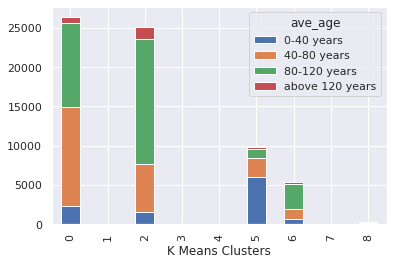

In [0]:
#Plotting the building age in comparison with the clusters
pd.crosstab(X['kmeans_age'],energy_df00["ave_age"]).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

There wasn't much to derive from these results as it seems that there are no distinct clusters with reagard to building age.

**Total population**

In [0]:
def tot_pop(x):
    if x>=100:
        return "Above 100"   
    elif x>=80:
        return "80-100" 
    elif x>=60:
        return "60-80"
    elif x>=40:
        return "40-60"
    elif x>=20:
        return "20-40"            
    else:
        return "0-20"

In [0]:
energy_df00["tot_pop"] = energy_df00['total_population'].apply(tot_pop)

In [0]:
energy_df["total_population"].describe()

count    67051.000000
mean       105.171571
std        801.255732
min          0.000000
25%         37.000000
50%         64.000000
75%        105.000000
max      67388.000000
Name: total_population, dtype: float64

(array([ 7601.,     0., 18263.,     0., 10148.,     0., 12801.,     0.,
         7726., 10512.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

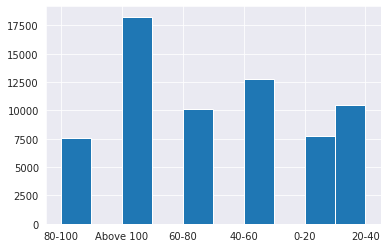

In [0]:
plt.hist(energy_df00["tot_pop"])

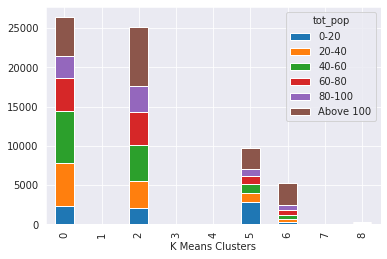

In [0]:
#Plotting the total population in comparison with the clusters
pd.crosstab(X['kmeans_age'],energy_df00["tot_pop"]).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')
plt.show()

Similarly, there was nothing unique with respect to the total population per cluster.

**KWH**

In [0]:
energy_df00["total_kwh"].describe()

count    6.705100e+04
mean     2.352432e+05
std      4.266332e+06
min      1.020000e+02
25%      2.861800e+04
50%      6.234150e+04
75%      1.175615e+05
max      5.831747e+08
Name: total_kwh, dtype: float64

In [0]:
def new_kwh(x):
    if x>=100000000:
        return "Hundreds of Millions"
    elif x>=10000000:
        return "Tens of Millions"
    elif x>=1000000:
        return "Millions"
    elif x>=100000:
        return "Hundreds of Thousands"
    elif x>=10000:
        return "Tens of Thousands"
    elif x>=1000:
        return "Thousands"       
    else:
        return "Hundreds"

In [0]:
energy_df00["kwh_cluster"] = energy_df00['total_kwh'].apply(new_kwh)

Text(0.5, 0, 'K Means Clusters')

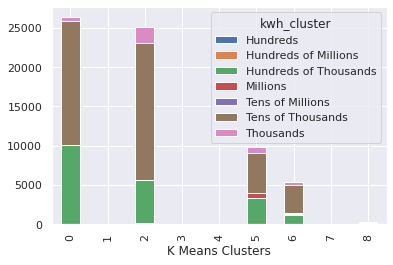

In [0]:
#Plotting the kwh in comparison with the clusters
pd.crosstab(X['kmeans_energy'],energy_df7["kwh_cluster"]).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')

The kw did not show any distict clusters.


**Building type and Building subtype**

Text(0.5, 0, 'K Means Clusters')

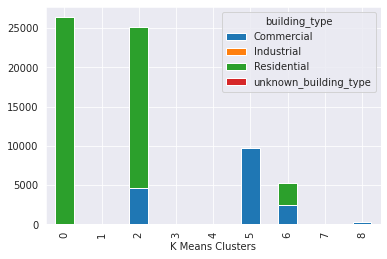

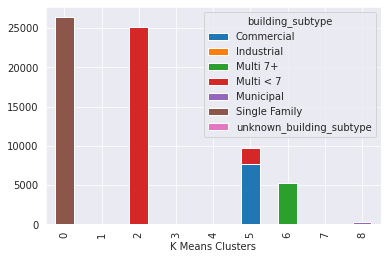

In [0]:
pd.crosstab(X['kmeans_type'],energy_df7["building_type"]).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')
pd.crosstab(X['kmeans_type'],energy_df7["building_subtype"]).plot.bar(stacked=True)
plt.xlabel('K Means Clusters')


This clearly shows some distinction between the clusters. the residential/ single family is in one cluster, residential/ multi < 7 is  in another.
Then the commercial and industrial. This indicates that the clusters are made on the basis of the usage.From the visualization, it is clear that there are 4 major clusters that describe most features in the dataset

**<h2>GMM</h2>**

As discussed before , because none of the variables conforms to a normal distribution, GMM clustering cannot be considered as a potential algorithm to use.

**<h1>Analysis</h1>**

<p>The clustering algorithms used are DBSCAN and K means. For both methods, the optimum number of clusters is 9. Hierarchical clustering was not used because a dendogram showed that it was unable to find discrete clusters. The GMM was not ultimately used for clustering because the variables were not normally distributed.  The performance of the DBSCAN is better than the K-means when a comparison of the silhouette scores is used. The silhouette score for k-means is 0.36 as compared to the DBSCAN with 0.37. On further analysis, I found that the clusters were made on the basis of the subtype: </p>

<p>For future work, I want to group the data by the subtype and do further clustering analysis to figure out the unique clusters with individual classes to understand the behavior of different consumers per clusted generated. Additionally, I would add demographic data to see if and how that impacted our results. </p>